In [8]:
import os
import tensorflow as tf
import pandas as pd
from PIL import Image

In [13]:
def slide_extract_patches(slide_path, patch_size, patch_path):
    """_summary_

    Args:
        slide_path (_type_): _description_
        patch_size (_type_): _description_
        patch_path (_type_): _description_

    Returns:
        _type_: _description_
    """
    slide = Image.open(slide_path)
    uuid = slide_path.split("/")[-1].split(".")[0]

    slide_width, slide_height = slide.size
    patch_width, patch_height = patch_size

    patches = list()
    for left in range(0, slide_width, patch_width):
        for top in range(0, slide_height, patch_height):
            right, bottom = left + patch_width, top + patch_height
            crop_box_coords = (left, top, right, bottom)

            patch = slide.crop(crop_box_coords)
            patches.append(patch)

            if len(patch_path) > 1:
                slide_patch_path = os.path.join(patch_path, uuid)
                os.makedirs(slide_patch_path, exist_ok=True)
                patch.save(
                    "{}/{}_left_{}_top_{}_right_{}_bottom_{}_patch.png".format(
                        slide_patch_path, uuid, left, top, right, bottom
                    )
                )

    return patches

In [14]:
slide_path = "/home/quincy/data/BACH/Benign/b001.tif"
patch_size = (256, 256)
patch_path = ""

In [15]:
patches = slide_extract_patches(slide_path, patch_size, patch_path)

In [16]:
len(patches)

48

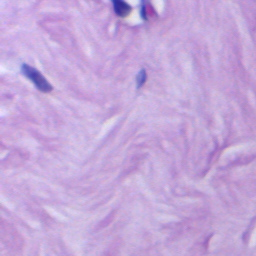

In [18]:
patches[0]